# Table of Contents
 <p><div class="lev3 toc-item"><a href="#Code-written-to-demonstrate-various-ways-to-read-in-a-file-in-python-and-data-wrangling" data-toc-modified-id="Code-written-to-demonstrate-various-ways-to-read-in-a-file-in-python-and-data-wrangling-001"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Code written to demonstrate various ways to read in a file in python and data wrangling</a></div><div class="lev1 toc-item"><a href="#reading-in-data" data-toc-modified-id="reading-in-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>reading in data</a></div><div class="lev2 toc-item"><a href="#using-builtin-functions:-readlines()" data-toc-modified-id="using-builtin-functions:-readlines()-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>using builtin functions: readlines()</a></div><div class="lev2 toc-item"><a href="#using-built-functions:-readline()" data-toc-modified-id="using-built-functions:-readline()-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>using built functions: readline()</a></div><div class="lev2 toc-item"><a href="#using-built-in-functions:-read()-to-read-the-whole-file-at-once" data-toc-modified-id="using-built-in-functions:-read()-to-read-the-whole-file-at-once-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>using built in functions: read() to read the whole file at once</a></div><div class="lev2 toc-item"><a href="#storing-the-data-after-reading-it" data-toc-modified-id="storing-the-data-after-reading-it-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>storing the data after reading it</a></div><div class="lev2 toc-item"><a href="#numpy-methods:-genfromtxt-and-loadtxt---excellent-to-read-in-files-containing-only-or-mostly-numbers" data-toc-modified-id="numpy-methods:-genfromtxt-and-loadtxt---excellent-to-read-in-files-containing-only-or-mostly-numbers-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>numpy methods: genfromtxt and loadtxt - excellent to read in files containing only or mostly numbers</a></div><div class="lev2 toc-item"><a href="#the-allmighty-pandas-data-reader" data-toc-modified-id="the-allmighty-pandas-data-reader-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>the allmighty pandas data reader</a></div><div class="lev1 toc-item"><a href="#data-manipulation-with-dataframes" data-toc-modified-id="data-manipulation-with-dataframes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data manipulation with dataframes</a></div><div class="lev2 toc-item"><a href="#selecting-values-by-content" data-toc-modified-id="selecting-values-by-content-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>selecting values by content</a></div><div class="lev2 toc-item"><a href="#removing-columns" data-toc-modified-id="removing-columns-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>removing columns</a></div><div class="lev2 toc-item"><a href="#plotting" data-toc-modified-id="plotting-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plotting</a></div><div class="lev3 toc-item"><a href="#Figure-1:" data-toc-modified-id="Figure-1:-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Figure 1:</a></div><div class="lev3 toc-item"><a href="#Figure-2:" data-toc-modified-id="Figure-2:-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Figure 2:</a></div><div class="lev3 toc-item"><a href="#Figure-3:" data-toc-modified-id="Figure-3:-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Figure 3:</a></div><div class="lev3 toc-item"><a href="#Figure-4:" data-toc-modified-id="Figure-4:-234"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Figure 4:</a></div>

In [73]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
#import json
import pylab as pl

%pylab inline
import seaborn


Populating the interactive namespace from numpy and matplotlib


### Code written to demonstrate various ways to read in a file in python and data wrangling 

Uses 311 data: reports and complains issued by citizens to the NYC agencies
The data is downloaded in CSV format from [NYC open data](https://nycopendata.socrata.com/data?cat=business) and available on https://serv.cusp.nyu.edu/~fbianco/PUIdata/

- 311_Service_Requests_from_2010_to_Present_short.csv is a reducted file wchich contains id, date, zip, location in XY state coords, longitude, latitude, and contains 100 rows.
- 311_Service_Requests_from_2010_to_Present_head.csv contains all variables, but only 100 lines
-  311_Service_Requests_from_2010_to_Present_short.csv contains all variables all rows (34898). It is large and I only use it when I use pandas because with all other functions it is really slow!
- NYPD_7_Major_Felony_Incidents.csv is the crime data from NYOD also downloaded from [NYC open data](https://nycopendata.socrata.com/data?cat=business). Only the year 2015 is downloaded.

Note that there is a lot of output dumped in this file. This is because I am trying to show how the data is formatted once ingested.

 CUSP [PUI2018](https://serv.cusp.nyu.edu/~fbianco/PUI2018)

In [2]:
# use the environmental variable PUIDATA to access data stored in your own PUIDATA directory
PUIdata = os.getenv('PUIDATA')

print (PUIdata)

/Users/fbb/science/Dropbox//UI/PUIdata


# reading in data

## using builtin functions: readlines()

In [26]:
# opening the file the old fashion way: a C style read
!curl -O https://serv.cusp.nyu.edu/~fbianco/PUIdata/NYPD_7_Major_Felony_Incidents.csv"
!curl -O https://serv.cusp.nyu.edu/~fbianco/PUIdata/311_Service_Requests_from_2010_to_Present_short.csv
!curl -O https://serv.cusp.nyu.edu/~fbianco/PUIdata/311_Service_Requests_from_2010_to_Present_head.csv
!curl -O https://serv.cusp.nyu.edu/~fbianco/PUIdata/311_Service_Requests_from_2010_to_Present.csv
!mv 311_*.csv NYP*csv $PUIDATA
!$PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8520  100  8520    0     0  28033      0 --:--:-- --:--:-- --:--:-- 28305
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63114  100 63114    0     0   217k      0 --:--:-- --:--:-- --:--:--  220k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.0M  100 21.0M    0     0  1004k      0  0:00:21  0:00:21 --:--:-- 1641k720k      0  0:00:29  0:00:03  0:00:26  721k  0     0   866k      0  0:00:24  0:00:14  0:00:10  951k
/bin/sh: /Users/fbb/science/Dropbox//UI/PUIdata: is a directory


In [27]:
fin = open(PUIdata + "/311_Service_Requests_from_2010_to_Present_short.csv", "r")

In [28]:
# within Python you can ask for help on a function or variable
# here readlines is a method of a File variable
fin.readlines?

In [29]:
csv = fin.readlines()
csv[1]


'34212771,09/01/2016 12:00:06 AM,11413,1052223,185368,40.67520813178531,-73.75494944502233\n'

In [30]:
type(csv)

list

In [31]:
type(csv[0])

str

In [32]:
fin.close()

##  using built functions: readline()

In [33]:
fin = open(PUIdata + "/311_Service_Requests_from_2010_to_Present_head.csv", "r")
fin.readline?

In [34]:
for l in fin.readlines():
    print (l)   

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location

34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413,137-47 CARSON STREET,CA

In [35]:
fin.close()

##  using built in functions: read() to read the whole file at once

In [36]:
fin = open(PUIdata + "/311_Service_Requests_from_2010_to_Present_head.csv", "r")
fin.read?
fin.close()

In [37]:
with open(PUIdata + "/311_Service_Requests_from_2010_to_Present_head.csv") as fin:
    toodata = fin.read()
    print (toodata)
type(toodata)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413,137-47 CARSON STREET,CAR

str

In [38]:
type(toodata)

str

## storing the data after reading it

In [39]:
alldata = []
for l in csv:
    data = l.split(',')
    print (data)
    alldata.append(data)

['Unique Key', 'Created Date', 'Incident Zip', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude', 'Longitude\n']
['34212771', '09/01/2016 12:00:06 AM', '11413', '1052223', '185368', '40.67520813178531', '-73.75494944502233\n']
['34212392', '09/01/2016 12:00:35 AM', '10469', '1023875', '259913', '40.87998640855491', '-73.85670741555177\n']
['34214520', '09/01/2016 12:00:37 AM', '11369', '1019812', '217879', '40.76463242381882', '-73.87162284918391\n']
['34212483', '09/01/2016 12:00:54 AM', '10466', '1025510', '261946', '40.885558858976104', '-73.85078238918491\n']
['34214231', '09/01/2016 12:01:15 AM', '10040', '1003750', '254115', '40.864140093130686', '-73.92950060219349\n']
['34223410', '09/01/2016 12:02:00 AM', '10031', '996684', '238064', '40.820097574803015', '-73.95507644617044\n']
['34219357', '09/01/2016 12:02:00 AM', '11365', '1041679', '208204', '40.73796206550144', '-73.79276687084037\n']
['34211394', '09/01/2016 12:02:03 AM', '11103', '1007798', '217595

In [40]:
alldata

[['Unique Key',
  'Created Date',
  'Incident Zip',
  'X Coordinate (State Plane)',
  'Y Coordinate (State Plane)',
  'Latitude',
  'Longitude\n'],
 ['34212771',
  '09/01/2016 12:00:06 AM',
  '11413',
  '1052223',
  '185368',
  '40.67520813178531',
  '-73.75494944502233\n'],
 ['34212392',
  '09/01/2016 12:00:35 AM',
  '10469',
  '1023875',
  '259913',
  '40.87998640855491',
  '-73.85670741555177\n'],
 ['34214520',
  '09/01/2016 12:00:37 AM',
  '11369',
  '1019812',
  '217879',
  '40.76463242381882',
  '-73.87162284918391\n'],
 ['34212483',
  '09/01/2016 12:00:54 AM',
  '10466',
  '1025510',
  '261946',
  '40.885558858976104',
  '-73.85078238918491\n'],
 ['34214231',
  '09/01/2016 12:01:15 AM',
  '10040',
  '1003750',
  '254115',
  '40.864140093130686',
  '-73.92950060219349\n'],
 ['34223410',
  '09/01/2016 12:02:00 AM',
  '10031',
  '996684',
  '238064',
  '40.820097574803015',
  '-73.95507644617044\n'],
 ['34219357',
  '09/01/2016 12:02:00 AM',
  '11365',
  '1041679',
  '208204',
  '4

## numpy methods: genfromtxt and loadtxt - excellent to read in files containing only or mostly numbers

In [41]:
np.genfromtxt?

In [42]:
# reading NUMERICAL ONLY  data 
data = np.genfromtxt(PUIdata + "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', usecols=(0,2,3,4,5,6), skip_header=1)
type(data)

numpy.ndarray

In [43]:
data[0]

array([ 3.42127710e+07,  1.14130000e+04,  1.05222300e+06,  1.85368000e+05,
        4.06752081e+01, -7.37549494e+01])

In [44]:
data.shape

(99, 6)

In [45]:
# reading NUMERICAL ONLY  data while unpacking it
data = np.genfromtxt(PUIdata + "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', usecols=(0,2,3,4,5,6), skip_header=1, 
                    unpack = True)
data.shape

(6, 99)

In [46]:
data[0]

array([34212771., 34212392., 34214520., 34212483., 34214231., 34223410.,
       34219357., 34211394., 34217294., 34213164., 34212770., 34214130.,
       34217841., 34212954., 34216160., 34216500., 34221835., 34211702.,
       34219447., 34217113., 34214548., 34221511., 34217276., 34217959.,
       34210942., 34213767., 34214112., 34212140., 34216046., 34214014.,
       34216956., 34226414., 34224524., 34217709., 34218143., 34222231.,
       34217303., 34213421., 34215972., 34222268., 34221144., 34213744.,
       34224352., 34223699., 34213166., 34212338., 34210938., 34216167.,
       34216756., 34213978., 34216504., 34213839., 34217179., 34216324.,
       34211957., 34211967., 34212999., 34214166., 34214406., 34213441.,
       34225420., 34215208., 34211102., 34211752., 34224255., 34216968.,
       34216052., 34225272., 34222223., 34218580., 34211701., 34218966.,
       34223817., 34218182., 34216138., 34218992., 34217470., 34214839.,
       34216795., 34211839., 34221378., 34213443., 

In [47]:
# reading hybrid data passing a dictionary of types
data =  np.genfromtxt(PUIdata + "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', dtype={'names':['id', 'date', 'zip','x','y','lat','lon'], 
                                             'formats':['d', 'S22', 'd', 'd', 'd', 'f', 'f']}, 
                      skip_header = 1)
type(data)

numpy.ndarray

In [48]:
data[0]

(34212771., b'09/01/2016 12:00:06 AM', 11413., 1052223., 185368., 40.67521, -73.75495)

In [49]:
data[1]

(34212392., b'09/01/2016 12:00:35 AM', 10469., 1023875., 259913., 40.879986, -73.856705)

## the allmighty pandas data reader

In [50]:
pd.read_csv?

In [51]:
df1 = pd.read_csv(PUIdata + "/311_Service_Requests_from_2010_to_Present.csv")
df1.columns

//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

# data manipulation with dataframes

In [52]:
df1['Resolution Description']

0        The Police Department responded to the complai...
1        The Police Department reviewed your complaint ...
2        The Police Department responded and upon arriv...
3        The Police Department issued a summons in resp...
4        The Department of Transportation inspected thi...
5        The Department of Environmental Protection det...
6        The Department of Sanitation investigated this...
7        The Taxi and Limousine Commission will contact...
8        The Police Department responded to the complai...
9        The Police Department responded to the complai...
10       The Police Department responded to the complai...
11       The Police Department responded and upon arriv...
12       The Taxi and Limousine Commission will contact...
13       The Police Department responded and upon arriv...
14       The Police Department responded to the complai...
15       The Police Department responded and upon arriv...
16       The following complaint conditions are still o.

In [53]:
df1['Complaint Type']

0               Noise - Residential
1                  Blocked Driveway
2                  Blocked Driveway
3                  Blocked Driveway
4                  Street Condition
5                      Water System
6              Sanitation Condition
7                    Taxi Complaint
8               Noise - Residential
9                Noise - Commercial
10               Noise - Commercial
11                  Illegal Parking
12                   Taxi Complaint
13                  Illegal Parking
14                  Illegal Parking
15                 Blocked Driveway
16                   HEAT/HOT WATER
17          Noise - Street/Sidewalk
18                     Water System
19                  Illegal Parking
20                 Street Condition
21                 Dirty Conditions
22                            Forms
23          Noise - Street/Sidewalk
24              Noise - Residential
25                 Street Condition
26                  Illegal Parking
27                          

## selecting values by content

In [54]:
df1['Complaint Type'].str.contains("Noise")

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8         True
9         True
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17        True
18       False
19       False
20       False
21       False
22       False
23        True
24        True
25       False
26       False
27       False
28        True
29        True
         ...  
34867     True
34868    False
34869     True
34870    False
34871    False
34872    False
34873     True
34874    False
34875    False
34876     True
34877     True
34878    False
34879     True
34880     True
34881     True
34882     True
34883     True
34884     True
34885     True
34886    False
34887     True
34888    False
34889     True
34890     True
34891     True
34892     True
34893     True
34894    False
34895    False
34896     True
Name: Complaint Type, Length: 34897, dtype: bool

In [55]:
#indexing a dataframe by the value of a feature (series-column)
dfNoise = df1[df1['Complaint Type'].str.contains("Noise")]

In [56]:
dfNoise.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413.0,137-47 CARSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675208,-73.754949,"(40.67520813178531, -73.75494944502233)"
8,34217294,09/01/2016 12:02:07 AM,09/01/2016 03:46:46 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10468.0,2685 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866838,-73.893802,"(40.86683824468553, -73.89380189150275)"
9,34213164,09/01/2016 12:03:16 AM,09/01/2016 03:46:38 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11222.0,284 DRIGGS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.722566,-73.948944,"(40.7225662037401, -73.94894420645994)"
10,34212770,09/01/2016 12:03:35 AM,09/01/2016 03:46:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11249.0,149 NORTH 6 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.717440,-73.958558,"(40.717440110199995, -73.95855823667199)"
17,34211702,09/01/2016 12:06:56 AM,09/01/2016 04:59:06 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11221.0,194 STUYVESANT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688583,-73.933184,"(40.68858343380662, -73.93318387971877)"


## removing columns

In [57]:
dfNoise.drop([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name',u'Location'],axis = 1)

,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,1052223.0,185368.0,40.675208,-73.754949
8,1013623.0,255108.0,40.866838,-73.893802
9,998402.0,202531.0,40.722566,-73.948944
10,995738.0,200662.0,40.717440,-73.958558
17,1002780.0,190153.0,40.688583,-73.933184
23,995025.0,182824.0,40.668480,-73.961159
24,1016737.0,213135.0,40.751623,-73.882746
28,1003028.0,216533.0,40.760990,-73.932216
29,1010935.0,215224.0,40.757376,-73.903679
30,1001875.0,156569.0,40.596404,-73.936535


In [58]:
dfNoise.drop([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name',u'Location'], axis = 1, inplace=True)
dfNoise.head()

//anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,1052223.0,185368.0,40.675208,-73.754949
8,1013623.0,255108.0,40.866838,-73.893802
9,998402.0,202531.0,40.722566,-73.948944
10,995738.0,200662.0,40.717440,-73.958558
17,1002780.0,190153.0,40.688583,-73.933184


## plotting

Text(0.5,1,'Noise complaints')

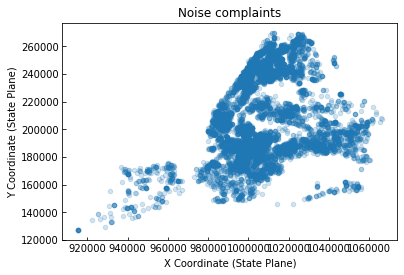

In [74]:
ax = dfNoise.plot.scatter(x='X Coordinate (State Plane)', y='Y Coordinate (State Plane)', alpha=0.2)
ax.set_title("Noise complaints")

### Figure 1: 
origin of all 311 complaints mapped in State Plane coordinates (feet)

Text(0.5,1,'All complaints')

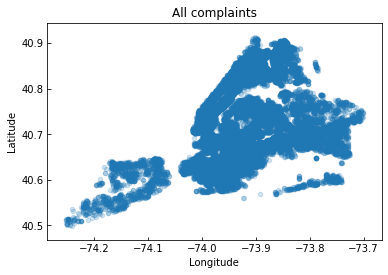

In [75]:
ax = df1.plot(x='Longitude', y='Latitude', kind="scatter",alpha=0.2)
ax.set_title("All complaints")

### Figure 2: 
origin of all 311 complaints mapped in Geographical Coordinates (Long and Lat)

Text(0.5,1,'Noise complaints')

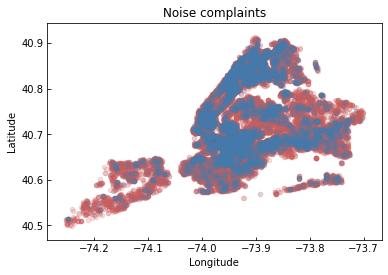

In [76]:
ax = df1.plot(x='Longitude', y='Latitude', kind="scatter", alpha=0.2, color="Indianred")
ax.set_title("All complaints")

dfNoise.plot(x='Longitude', y='Latitude', alpha=0.1, kind="scatter", ax=ax, color="SteelBlue")
ax.set_title("Noise complaints")

### Figure 3: 
origin of all 311 complaints related to noise (blue) overplotted all complains (red)

In [68]:
# add a dataframe

In [69]:
dfCrime = pd.read_csv(PUIdata + "/NYPD_7_Major_Felony_Incidents.csv")
dfCrime.columns

Index(['OBJECTID', 'Identifier', 'Occurrence Date', 'Day of Week',
       'Occurrence Month', 'Occurrence Day', 'Occurrence Year',
       'Occurrence Hour', 'CompStat Month', 'CompStat Day', 'CompStat Year',
       'Offense', 'Offense Classification', 'Sector', 'Precinct', 'Borough',
       'Jurisdiction', 'XCoordinate', 'YCoordinate', 'Location 1'],
      dtype='object')

In [70]:
dfCrime['Location 1'][0]

'(40.6029515910001, -73.749976261)'

In [71]:
dfCrime['Longitude'] = dfCrime['Location 1'].map(lambda x: float(x.replace('(','').replace(')','').split(',')[1]))
dfCrime['Latitude'] = dfCrime['Location 1'].map(lambda x: float(x.replace('(','').replace(')','').split(',')[0]))
dfCrime = dfCrime[:1000]

Text(0.5,1,'Noise complaints and Crime')

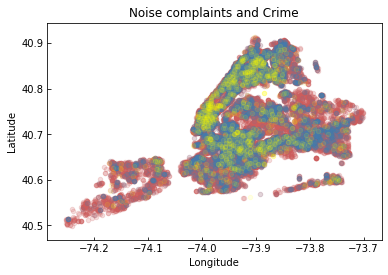

In [72]:
ax = df1.plot(x='Longitude', y='Latitude', kind="scatter", alpha=0.2, color="Indianred")
ax.set_title("All complaints")

dfNoise.plot(x='Longitude', y='Latitude', alpha=0.1, kind="scatter", ax=ax, color="SteelBlue")


dfCrime.plot(x='Longitude', y='Latitude', alpha=0.1, kind="scatter", ax=ax, color="Yellow")
ax.set_title("Noise complaints and Crime")

### Figure 4: 
origin of all 311 complaints related to noise (blue) overplotted all complains (red), 
and Crime statistics for all 7 major fellonies (yellow) (all for a short time spam of a few weeks in the recent past)